### 1 股票市场简介

#### 1.1 多层次股票市场

#### 1.2 主要的股票指数

指数数据下载与可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
index_data = pd.read_excel('./配套彩图和数据/数据/第八章/国内A股主要股指的日收盘数据（2014-2018）.xlsx',\
                          sheet_name='Sheet1', header=0, index_col=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218B15B9BE0>,
      dtype=object)

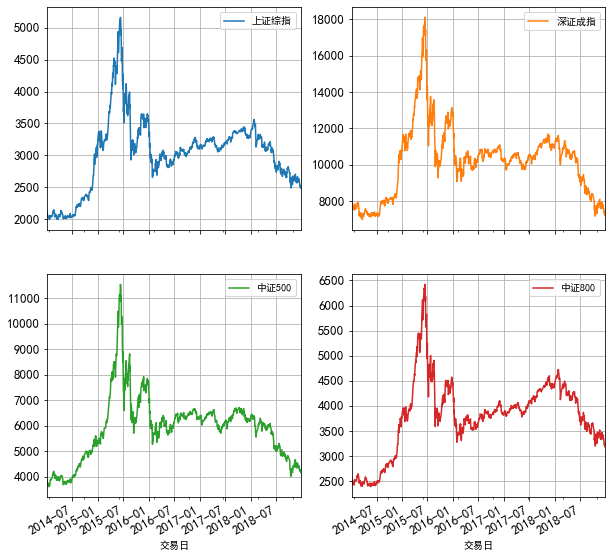

In [3]:
index_data.plot(subplots=True, layout=(2,2), figsize=(10, 10), fontsize=13, grid=True)

### 2 股票投资组合

#### 2.1 投资组合的主要变量

##### 2.1.1 投资组合的预期收益率

$E(R_p) = E(\sum_{i=1}^Nw_iR_i)=\sum_{i=1}^Nw_iE(R_i)$  
$=[w_i, w_2,...,w_N][E(R_1),E(R_2),...,E(R_N)]^T$

其中$E(R_p)$代表了投资组合的预期收益率，$w_i$是权重

在计算股票收益率的时候，针对第i只股票在第t个交易日的收益率需要转换成连续复利收益率

$R_{it}=\frac{P_{it}}{P_{it-1}}$

可以用随机数进行生成

In [10]:
x = np.random.random(5)
weights = x/np.sum(x)
weights

array([0.18030453, 0.1587465 , 0.24870674, 0.08099294, 0.33124929])

In [14]:
round(sum(weights),2)

1.0

##### 2.1.2 投资组合的波动率

$\sigma_P^2 = w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1^2w_2^2Cov(R_1,R_2)$
$=w_1^2\sigma_1^2+w_2^2\sigma_2^2+2w_1^2w_2^2\rho_{12}\sigma_1^2\sigma_2^2$

$\sigma_P^2 = \sum_{i=1}^N\sum_{j=1}^Nw_iw_jCov(R_i,R_j)$
$=\sum_{i=1}^N\sum_{j=1}^Nw_iw_j\rho_{ij}\sigma_i\sigma_j$

波动率大致遵循平方根法则：   
周波动率 = $\sqrt{5}$ x 日波动率  
月波动率 = $\sqrt{22}$ x 日波动率  
年波动率 = $\sqrt{252}$ x 日波动率  

##### 2.1.3 案例

In [18]:
data = pd.read_excel('./配套彩图和数据/数据/第八章/构建投资组合的五只股票数据（2016-2018）.xlsx',\
                          sheet_name='Sheet1', header=0, index_col=0)

In [19]:
data.head()

,上海机场,宝钢股份,海通证券,工商银行,中国石油
日期,,,,,
2016-01-04,28.27,5.23,14.28,4.45,8.13
2016-01-05,28.76,5.43,14.33,4.47,8.07
2016-01-06,29.50,5.97,14.58,4.51,8.31
2016-01-07,27.99,5.38,13.23,4.43,7.83
2016-01-08,28.03,5.92,13.51,4.46,7.99


将股价按收购交易日记性归一化处理并可视化

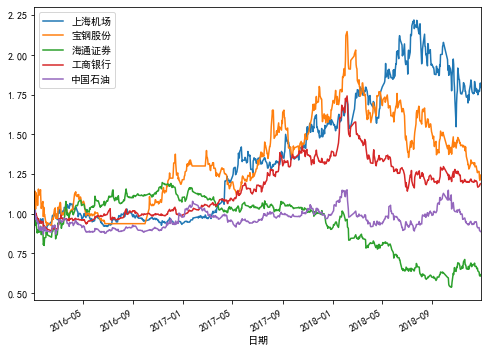

In [21]:
(data/ data.iloc[0]).plot(figsize=(8,6))

计算对数收益率并删除缺省值

In [22]:
R = np.log(data/data.shift(1))
R = R.dropna()
R.describe()

,上海机场,宝钢股份,海通证券,工商银行,中国石油
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.000802,0.000298,-0.000663,0.000237,-0.000165
std,0.019078,0.021775,0.016945,0.012614,0.012901
min,-0.105361,-0.104059,-0.098549,-0.067593,-0.082521
25%,-0.008854,-0.009260,-0.007118,-0.004662,-0.005274
50%,0.000372,0.000000,-0.000648,0.000000,0.000000
75%,0.008488,0.010305,0.006625,0.006316,0.005203
max,0.088763,0.095648,0.095198,0.059223,0.070761


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219EFB4F198>,
      dtype=object)

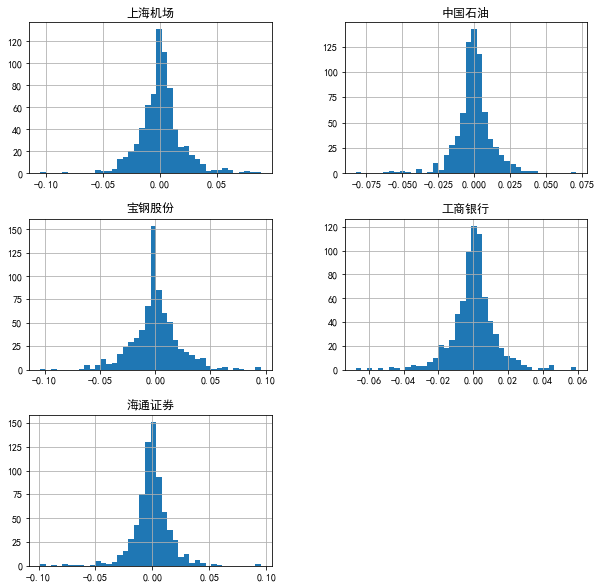

In [26]:
R.hist(bins=40, figsize=(10, 10))

计算每只股票的平均收益率、波动率及协方差，由于是日数据，需要进行年化处理

In [31]:
R_mean = R.mean()*252 
R_mean

上海机场    0.202051
宝钢股份    0.075045
海通证券   -0.167117
工商银行    0.059691
中国石油   -0.041456
dtype: float64

In [30]:
R_cov = R.cov()*252
R_cov

,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,0.091724,0.022705,0.022375,0.014478,0.017292
宝钢股份,0.022705,0.119489,0.042816,0.023992,0.030719
海通证券,0.022375,0.042816,0.072361,0.021051,0.028913
工商银行,0.014478,0.023992,0.021051,0.040094,0.016621
中国石油,0.017292,0.030719,0.028913,0.016621,0.041939


相关性较弱，分散化效果好

In [32]:
R_corr = R.corr()
R_corr

,上海机场,宝钢股份,海通证券,工商银行,中国石油
上海机场,1.000000,0.216880,0.274644,0.238733,0.278804
宝钢股份,0.216880,1.000000,0.460463,0.346625,0.433946
海通证券,0.274644,0.460463,1.000000,0.390828,0.524851
工商银行,0.238733,0.346625,0.390828,1.000000,0.405316
中国石油,0.278804,0.433946,0.524851,0.405316,1.000000


In [33]:
R_vol = R.std() * np.sqrt(252)
R_vol

上海机场    0.302861
宝钢股份    0.345671
海通证券    0.269000
工商银行    0.200236
中国石油    0.204791
dtype: float64

运用前面生成的随机权重书计算投资组合的预期收益率和收益波动率

In [42]:
R_port = np.sum(weights*R_mean)
R_port

-0.002117109787623849

In [44]:
vol_port = np.sqrt(np.dot(weights, np.dot(weights,R_cov,weights.T)))
vol_port

0.01431155934646187

#### 2.2 投资组合的有效前沿

##### 2.2.1 通过Python绘制可行集

In [63]:
Rp_list = [] #初始投资组合收益率数列
Vp_list = [] #初始投资组合收益率波动率数列
for i in np.arange(1000):
    x=np.random.random(5)
    weights=x/sum(x)
    Rp_list.append(np.sum(weights*R_mean))
    Vp_list.append(np.sqrt(np.dot(weights,np.dot(R_cov, weights.T))))

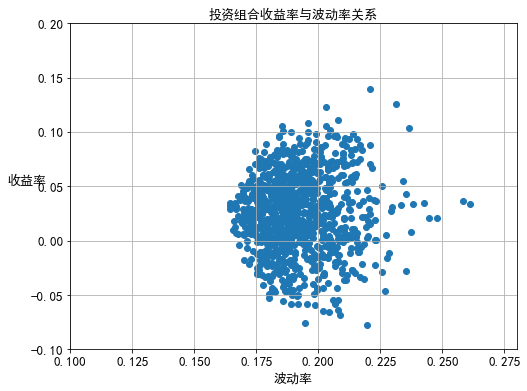

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.1, 0.28)
plt.ylim(-0.1, 0.2)
plt.title(u'投资组合收益率与波动率关系', fontsize=13)
plt.grid('True')
plt.show()

##### 2.2.2 通过Python构建有效前沿

$$\mathop{min}_{w_i}\sigma_P = \mathop{min}_{w_i}\sqrt{\sum_{i=1}^N\sum_{j=1}^Nw_iw_jCov(R_i, R_j)}$$

约束条件是$\sum_{i=1}^Nw_i=1, w_i>0$，即股票不允许卖空

定义一个求解最优化的函数

In [66]:
import scipy.optimize as sco
def f(w):
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov, w.T)))
    return np.array([Rp_opt, Vp_opt])

定义一个得到最小波动率的权重函数

In [67]:
def Vmin_f(w): 
    return f(w)[1]

In [70]:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1}, {'type':'eq', 'fun':lambda x:f(x)[0]-0.1})

以元组形式输入权重的边界条件

In [70]:
bnds = tuple((0,1) for x in range(len(R_mean)))

In [71]:
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

生成权重相等的数组

In [72]:
len(R_mean) * [1.0 / len(R_mean),] 

[0.2, 0.2, 0.2, 0.2, 0.2]

In [74]:
result = sco.minimize(Vmin_f, len(R_mean)*[1.0/len(R_mean),], method='SLSQP', bounds=bnds, constraints=cons)

In [75]:
result

     fun: 0.17927841211375126
     jac: array([0.22894758, 0.16720968, 0.13092469, 0.15967071, 0.11030144])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.33441982, 0.06143945, 0.        , 0.52265186, 0.08148887])

In [78]:
round(result['x'][0],4) #预期收益率10%时上海机场的权重

0.3344

In [79]:
round(result['x'][1],4) #预期收益率10%时宝钢股份的权重

0.0614

In [80]:
round(result['x'][2],4) #预期收益率10%时海通证券的权重

0.0

In [81]:
round(result['x'][3],4) #预期收益率10%时工商银行的权重

0.5227

In [82]:
round(result['x'][4],4) #预期收益率10%时中国石油的权重

0.0815

进行有限前沿可视化之前需要全局计算投资收益率和波动率

In [85]:
cons_vmin = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})
result_vmin = result = sco.minimize(Vmin_f, len(R_mean)*[1.0/len(R_mean),], method='SLSQP', bounds=bnds, constraints=cons_vmin)
Rp_vmin = np.sum(R_mean * result_vmin['x'])
Vp_vmin = result_vmin['fun']

进行有效前沿的可视化

In [86]:
Rp_target = np.linspace(Rp_vmin, 0.25, 100) #生成投资组合的目标收益率数组
Vp_target = []
for r in Rp_target:
    cons_new = ({'type':'eq', 'fun':lambda x: np.sum(x)-1},{'type':'eq', 'fun':lambda x :f(x)[0]-r})
    result_new = sco.minimize(Vmin_f, len(R_mean)*[1.0/len(R_mean),], method='SLSQP', bounds = bnds, constraints=cons_new)
    Vp_target.append(result_new['fun'])

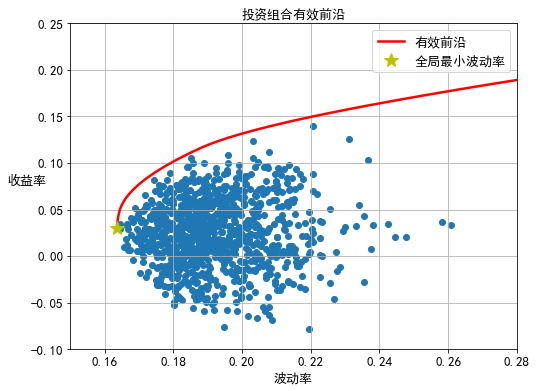

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label=u'有效前沿', lw=2.5)
plt.plot(Vp_vmin, Rp_vmin, 'y*',label=u'全局最小波动率', markersize=14)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.15, 0.28)
plt.ylim(-0.1, 0.25)
plt.title(u'投资组合有效前沿', fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

#### 2.3 资本市场线

CML $E(R_p) = R_p + [\frac{E(R_M)-R_F}{\sigma_M}]\sigma_P$   
$\frac{E(R_M)-R_F}{\sigma_M}$即夏普比率

计算资本市场线的斜率就是求解最大值：  
$$\mathop{max}_{w_i}\frac{E(R_p)-R_F}{\sigma_P}$$

假定rf = 2%/年

In [92]:
import scipy.optimize as sco
def F(w):
    Rf=0.02
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov, w.T)))
    SR=(Rp_opt-Rf)/Vp_opt
    return np.array([Rp_opt, Vp_opt, SR])

定义一个使负的SR最小，也就是其最大

In [93]:
def SRmin_F(w):
    return -F(w)[2]

In [94]:
cons_SR = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

In [95]:
result_SR = result_new = sco.minimize(SRmin_F, len(R_mean)*[1.0/len(R_mean),], method='SLSQP', bounds = bnds, constraints=cons_SR)

In [96]:
Rf = 0.02
slope = -result_SR['fun'] #CML的斜率
Rm = np.sum(R_mean*result_SR['x'])
Vm = (Rm -Rf)/slope

In [102]:
Rp_cml = np.linspace(0.02, 0.25)
Vp_cml = (Rp_cml - Rf)/slope

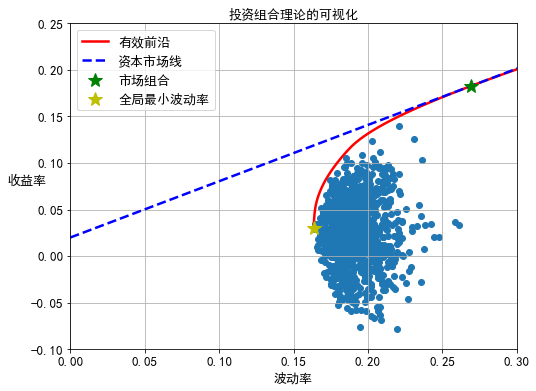

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(Vp_list, Rp_list)
plt.plot(Vp_target, Rp_target, 'r-', label=u'有效前沿', lw=2.5)
plt.plot(Vp_cml, Rp_cml, 'b--', label=u'资本市场线', lw=2.5)
plt.plot(Vm, Rm, 'g*',label=u'市场组合', markersize=14)
plt.plot(Vp_vmin, Rp_vmin, 'y*',label=u'全局最小波动率', markersize=14)
plt.xlabel(u'波动率', fontsize=13)
plt.ylabel(u'收益率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.0, 0.3)
plt.ylim(-0.1, 0.25)
plt.title(u'投资组合理论的可视化', fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

### 3 资本资产定价模型

#### 3.1 系统风险与非系统风险

上证180指数，股票与整个组合的关系，非2016-2018期间上市的剩下155只，从1只添加到所有只

In [108]:
stocks_data = pd.read_excel('./配套彩图和数据/数据/第八章/上证180指数成分股日收盘价（2016-2018年（剔除该期间上市的股票））.xlsx',\
                          sheet_name='Sheet1', header=0, index_col=0)

In [109]:
stocks_data.columns

Index(['洛阳钼业', '华友钴业', '口子窖', '海天味业', '中科曙光', '中信银行', '金隅集团', '中国重工', '永辉超市',
       '中远海控',
       ...
       '宝钢股份', '上港集团', '民生银行', '华夏银行', '华能国际', '包钢股份', '上海机场', '首创股份', '白云机场',
       '浦发银行'],
      dtype='object', length=155)

In [110]:
stocks_data.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='日期', length=731, freq=None)

计算每只股票的日收益率数据

In [111]:
return_stocks = np.log(stocks_data/stock_data.shift(1)) #建立股票日收益率时间序列
return_stocks = return_stocks.dropna()
n = len(return_stocks.columns)
vol_port = np.zeros(n)

In [112]:
for i in range(1, n+1):
    weight = np.ones(i)/i
    return_cov = 252*return_stocks.iloc[:,:i].cov() #依次计算投资组合中股票收益率的年化协方差
    vol_port[i-1] = np.sqrt(np.dot(weight, np.dot(return_cov, weight.T))) #依次计算投资组合中股票收益率的年化波动率

In [113]:
N_list = np.arange(n)+1 #1到155

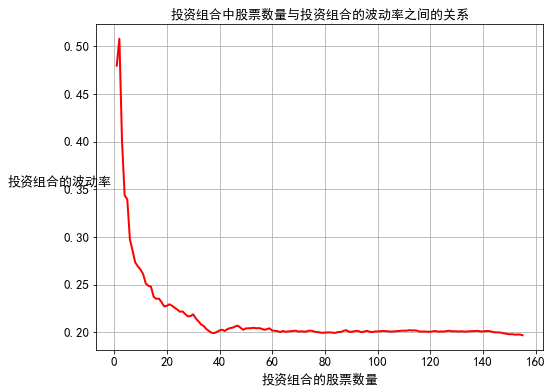

In [118]:
plt.figure(figsize=(8,6))
plt.plot(N_list, vol_port, 'r-', lw=2.0)
plt.xlabel(u'投资组合的股票数量', fontsize=13)
plt.ylabel(u'投资组合的波动率', fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'投资组合中股票数量与投资组合的波动率之间的关系', fontsize=13)
plt.grid('True')
plt.show()

开始股票越多，波动率迅速下降，但是当整个投资组合的股票数量超过40只的时候，整体的投资组合波动率开始趋于稳定，并且只保持在20%的水平，因此可以得出两个结论：  
- 1 当投资组合超过40只股票的时候，投资组合的风险已经很接近系统性风险了
- 2 波动率20%可以看做是系统性风险

#### 3.2 模型数学表达式及运用

CAPM公式：  
$E(R_i) = R_F + \beta_i[E(R_M) - R_F]$

Rm代表了系统风险的价格，βi衡量第i只股票的预期收益率对市场收益率的敏感程度

In [119]:
def Ri_CAPM(beta, Rm, Rf):
    return Rf + beta*(Rm - Rf)

CAPM模型中，核心是求解β，通常利用历史数据进行估计，运用统计学线性回归拟合得到

$R_{it} = \alpha_i + \beta_iR_{Mt}$

案例

以第2节上海机场和宝钢股份股票为例，以沪深300指数作为市场组合

In [121]:
data_index = pd.read_excel('./配套彩图和数据/数据/第八章/沪深300指数（2016-2018年）.xlsx',\
                          sheet_name='Sheet1', header=0, index_col=0)

In [122]:
R_index = np.log(data_index / data_index.shift(1))
R_index = R_index.dropna()

In [123]:
R_index.describe()

,沪深300指数
count,730.000000
mean,-0.000194
std,0.011610
min,-0.071853
25%,-0.005143
50%,0.000359
75%,0.005065
max,0.042262


计算β值，利用6.2的StatsModels

In [124]:
import statsmodels.api as sm
R_index_addcons = sm.add_constant(R_index)

C:\Users\fcncassandra\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [125]:
model_shjc = sm.OLS(endog=R.iloc[:,0], exog=R_index_addcons)
result_shjc = model_shjc.fit()
result_shjc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   上海机场   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           8.34e-39
Time:                        11:28:19   Log-Likelihood:                 1940.1
No. Observations:                 730   AIC:                            -3876.
Df Residuals:                     728   BIC:                            -3867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.506      0.132      -0.000       0.002
沪深300指数        0.7496      0.054     13.832      0.000       0.643       0.856
==============================================================================
Omnibus:                       93.029   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.812
Skew:                           0.459   Prob(JB):                     1.28e-98
Kurtosis:                       6.739   Cond. No.                         86.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

类似方式求解宝钢股份

In [127]:
model_bggf = sm.OLS(endog=R.iloc[:,1], exog=R_index_addcons)
result_bggf = model_bggf.fit()
result_bggf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   宝钢股份   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     350.8
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           3.50e-64
Time:                        11:31:28   Log-Likelihood:                 1901.9
No. Observations:                 730   AIC:                            -3800.
Df Residuals:                     728   BIC:                            -3791.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.763      0.446      -0.001       0.002
沪深300指数        1.0694      0.057     18.729      0.000       0.957       1.182
==============================================================================
Omnibus:                       99.438   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.780
Skew:                           0.683   Prob(JB):                     1.07e-61
Kurtosis:                       5.714   Cond. No.                         86.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 股价服从的随机过程

#### 4.1 马尔科夫过程和有效市场假说

##### 4.1.2 马尔科夫过程

##### 4.1.3 有效市场假说

#### 4.2 维纳过程与广义维纳过程

##### 4.2.1 维纳过程

具有以下两性质时，随机变量x被认为是服从维纳过程：

- 性质1：变量$x$在瞬时$\delta t$的变化量$\Delta x$满足等式：$\Delta x = \varepsilon \sqrt{\Delta t}$  
其中$\varepsilon$ 服从(0,1)标准正态分布，同时$\Delta t$可以视为常数，因此$\Delta x$也服从(0,$\Delta t$)正态分布  
- 性质2：在任何两个不相重叠的$\Delta t$的时间区间内，变化量$\Delta x$之间是相互独立的，这个性质就说明变量$x$服从马尔科夫过程  
$x_T - x_0 = \sum_{i=1}^N\varepsilon_i\sqrt{\Delta t}$，其中$N=T/\Delta t, \varepsilon$依然服从标准正态分布  
通过性质2可以得出不同的$\varepsilon_i$之间是相互独立的，可以得到$x_T - x_0$的网址为0，标准差为$\sqrt{N\Delta t}=\sqrt{T}$   
因此$x_T - x_0$服从(0,$\sqrt{T}$)的正态分布

##### 4.2.2 广义维纳过程

$dy = a{\rm d}t + b{\rm d}x$

$a{\rm d}t$说明变量y在单位时间$\Delta t$内的漂移率为$\alpha$  
$b{\rm d}x$是变量y路径上的噪声，幅度是维纳过程的b倍  
因此广义维纳过程的漂移率为$a$，方差率为$b^2$

用离散化表达方式：  
$\Delta y = a \Delta t + b\varepsilon\sqrt{\Delta t}$，则$\Delta y$服从($a \Delta t, b\sqrt{\Delta t}$)的正态分布

此外根据维纳过程的性质2，可以得到在任意时间区间T，变量y的变化量$\Delta y$服从正态分布，并且$\Delta y$的均值是$aT$、标准差是$b\sqrt{T}$以及方差是$b^2T$

### 4.3 几何布朗运动

$\rm{d}S = \mu S \rm{d}t + \sigma S \rm{d} x$  
$\frac{\rm{d}S}{S} = \mu \rm{d}t + \sigma \rm{d} x$  

##### 4.3.1 离散形式

$\frac{\Delta S}{S} = \mu \Delta t + \sigma \Delta x$    
$\frac{\Delta S}{S} = \mu \Delta t + \sigma \varepsilon \sqrt{\Delta t} \tag{4.3.1}$    
$\Delta S = \mu S \Delta t + \sigma S \varepsilon \sqrt{\Delta t}$  

对于(4.3.1)，$\sigma \varepsilon \sqrt{\Delta t}$是股票收益率的随机部分，由于非随机部分的方差是零，因此股票收益率中随机部分的方差$\sigma^2 \Delta x$就是股票收益率的整体方差

$\frac{\Delta S}{S}$就服从期望值$\mu \Delta t$、标准差$\sigma\sqrt{\Delta t}$的正态分布

##### 4.3.2 模拟服从几何布朗运动的股价

运用欧拉离散方法变化差分方程：  
$S_t = S_{t-\Delta t}e^{(\mu - \frac{1}{2}\sigma^2)\Delta t + \sigma\varepsilon_t\sqrt{\Delta t}}$

运用14-18年东航股票日收盘价格，模拟未来3年该股票的每日价格走势，路径共500条，将S0定位19年1月2日的4.73元/股

导入数据

In [134]:
S = pd.read_excel('./配套彩图和数据/数据/第八章/东方航空股票价格（2014-2018）.xlsx',\
                          sheet_name='Sheet1', header=0, index_col=0)

In [135]:
S.describe()

,东方航空
count,1220.000000
mean,6.225107
std,2.071298
min,2.260000
25%,5.307500
50%,6.730000
75%,7.290000
max,13.790000


In [136]:
S.tail()

,东方航空
日期,
2018-12-24,4.94
2018-12-25,4.99
2018-12-26,4.89
2018-12-27,4.78
2018-12-28,4.75


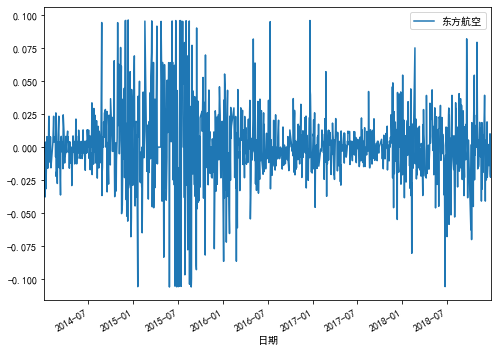

In [141]:
R = np.log(S/S.shift(1))
R = R.dropna()
R.plot(figsize=(8,6))

In [142]:
mu = R.mean()*252
sigma = R.std()*np.sqrt(252)

In [143]:
mu

东方航空    0.112985
dtype: float64

In [144]:
sigma

东方航空    0.463008
dtype: float64

输入需要模拟的参数

In [146]:
import numpy.random as npr
date = pd.DatetimeIndex(start = '2019-01-02', end='2021-12-31', freq='B')

C:\Users\fcncassandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


In [147]:
date

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=783, freq='B')

In [145]:
N = len(date)
I = 500 #500条路径
dt = 1.0/252
mu = np.array(mu)
sigma = np.array(sigma)
S_GBM = np.zeros((N,I))
S_GBM[0] = 4.73

C:\Users\fcncassandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


运用for语句并生成模拟的未来股价时间序列

In [148]:
S_GBM

array([[4.73, 4.73, 4.73, ..., 4.73, 4.73, 4.73],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [149]:
for t in range(1,N):
    epsilon = npr.standard_normal(I)
    S_GBM[t] = S_GBM[t-1] * np.exp((mu-0.5*sigma**2)*dt+sigma*epsilon*np.sqrt(dt))
S_GBM = pd.DataFrame(S_GBM, index =date)

In [150]:
S_GBM.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
2019-01-02,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,...,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000,4.730000
2019-01-03,4.506181,4.790151,4.711014,4.500951,4.568281,4.664893,4.426522,4.785584,4.566804,4.905721,...,4.735046,4.680780,4.657168,4.863933,4.726194,4.714549,4.751839,4.975939,4.759183,4.865890
2019-01-04,4.695721,4.800748,4.686461,4.545890,4.705041,4.625289,4.459985,5.026384,4.518610,4.922058,...,4.696198,4.739145,4.723089,5.008986,4.660179,4.845141,4.957742,4.938971,5.005618,4.803958
2019-01-07,4.644663,4.723980,4.775073,4.391673,4.857566,4.751652,4.342838,4.834944,4.454114,5.128090,...,4.870557,4.665793,4.745505,5.263832,4.776083,4.841354,4.907517,4.778816,5.123992,4.985517
2019-01-08,4.776075,4.850188,4.694346,4.203874,4.958209,4.849685,4.285183,4.784420,4.559760,5.294390,...,5.019247,4.865472,4.692676,5.480704,4.817968,4.886663,4.999480,4.953189,5.259190,4.974712


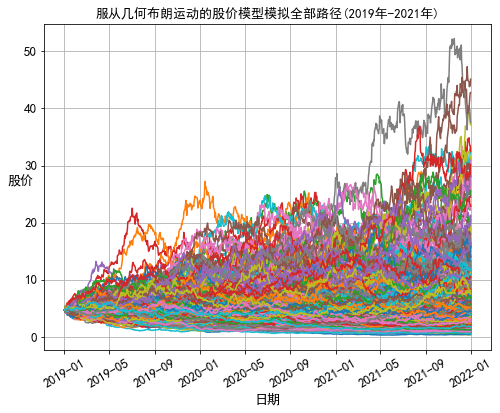

In [151]:
plt.figure(figsize=(8,6))
plt.plot(S_GBM)
plt.xlabel(u'日期', fontsize=13)
plt.ylabel(u'股价', fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=30)
plt.yticks(fontsize=13)
plt.title(u'服从几何布朗运动的股价模型模拟全部路径(2019年-2021年)', fontsize=13)
plt.grid('True')
plt.show()

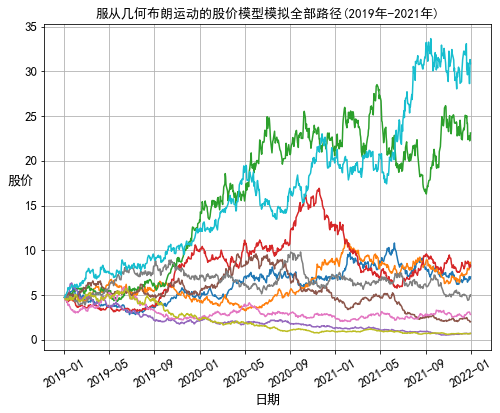

In [152]:
plt.figure(figsize=(8,6))
plt.plot(S_GBM.iloc[:,:10])
plt.xlabel(u'日期', fontsize=13)
plt.ylabel(u'股价', fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=30)
plt.yticks(fontsize=13)
plt.title(u'服从几何布朗运动的股价模型模拟全部路径(2019年-2021年)', fontsize=13)
plt.grid('True')
plt.show()